In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('sursaud-covid19-quotidien-2020-04-04-19h00-departement.csv')

In [4]:
df31 = df[df['dep'] == '31'].groupby('date_de_passage').sum()['nbre_hospit_corona']
df34 = df[df['dep'] == '34'].groupby('date_de_passage').sum()['nbre_hospit_corona']
df45 = df[df['dep'] == '45'].groupby('date_de_passage').sum()['nbre_hospit_corona']
df75 = df[df['dep'] == '75'].groupby('date_de_passage').sum()['nbre_hospit_corona']
df95 = df[df['dep'] == '95'].groupby('date_de_passage').sum()['nbre_hospit_corona']
df97 = df[df['dep'] == '97'].groupby('date_de_passage').sum()['nbre_hospit_corona']
dfAl = df[(df['dep'] == '67') | (df['dep'] == '68')].groupby('date_de_passage').sum()['nbre_hospit_corona']

dftot = df.groupby('date_de_passage').sum()['nbre_hospit_corona']

In [5]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep', 'article-twocolumns']


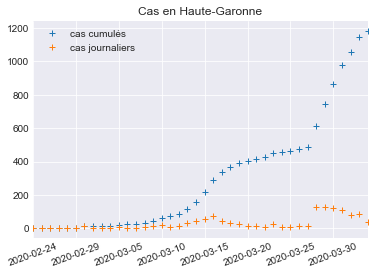

In [6]:
with plt.style.context(['seaborn-dark']):
    fig, ax = plt.subplots()

    df31.cumsum().plot(marker='+', linestyle='', label='cas cumulés', ax=ax)
    df31.plot(marker='+', linestyle='', label='cas journaliers', ax=ax)

    ax.set_xlabel('')

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_rotation(20)

    plt.grid()
    plt.legend()
    plt.title('Cas en Haute-Garonne')
    plt.savefig('covid31.png', dpi=150, bbox_inches='tight')
    plt.show()

In [7]:
pop = np.loadtxt('pop_insee_1erjan2020.txt', dtype=float)
poptot = sum(pop)
dep_list = np.loadtxt('dep.txt', dtype=str)
dep_nom = []
with open('dep_nom.txt', 'r') as f:
    dep_nom = [line[:-1] for line in f]
pop = dict(zip(dep_list, pop))
dep_nom = dict(zip(dep_list, dep_nom))

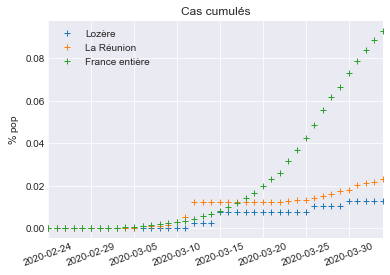

In [8]:
with plt.style.context(['seaborn-dark']):
    fig, ax = plt.subplots()
    low_dep = []
    for dep in df['dep'].unique():
        cdf = df[df['dep'] == dep].groupby('date_de_passage').sum()['nbre_hospit_corona']
        # average derivative last days
        Nnew = cdf.iloc[-5:].mean()
        # index of first case
        ifirst = np.argmax(cdf.values)
        if 0 < Nnew/pop[dep] < 20*1e-6 and ifirst < 22:
            low_dep.append(dep)
            (100 * cdf.cumsum()/pop[dep]).plot(marker='+', linestyle='', label=f'{dep_nom[dep]}', ax=ax)

            
    # add tot for France
    (100 * dftot.cumsum()/poptot).plot(marker='+', linestyle='', label=f'France entière', ax=ax)

    ax.set_ylabel('$\%$ pop')    
    ax.set_xlabel('')
    plt.legend()

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_rotation(20)
    
    plt.grid()
    plt.title('Cas cumulés')
    plt.savefig('coviddep.png', dpi=150, bbox_inches='tight')

    plt.show()

In [49]:
low_dep

['23', '2A', '31', '48', '974']

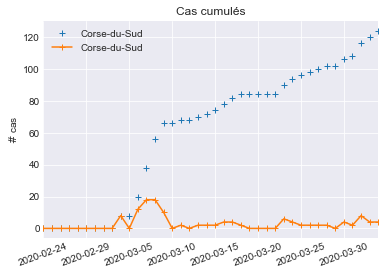

In [9]:
with plt.style.context(['seaborn-dark']):
    fig, ax = plt.subplots()
    low_dep = []
    for dep in ['2A']: #, '974']:
        cdf = df[df['dep'] == dep].groupby('date_de_passage').sum()['nbre_hospit_corona']
        # average derivative last days
        Nnew = cdf.iloc[-5:].mean()
        cdf.cumsum().plot(marker='+', linestyle='', label=f'{dep_nom[dep]}', ax=ax)
        cdf.plot(marker='+', linestyle=None, label=f'{dep_nom[dep]}', ax=ax)
            
    # add tot for France
    #(100 * dftot.cumsum()/poptot).plot(marker='+', linestyle='', label=f'France entière', ax=ax)

    ax.set_ylabel('$\#$ cas')    
    ax.set_xlabel('')
    plt.legend()

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_rotation(20)
    
    plt.grid()
    plt.title('Cas cumulés')
    plt.savefig('covid_ex.png', dpi=150, bbox_inches='tight')

    plt.show()

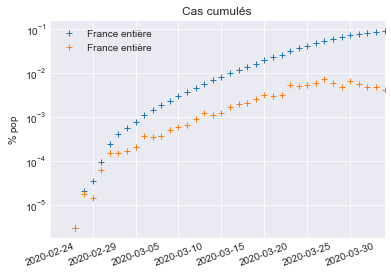

In [12]:
with plt.style.context(['seaborn-dark']):
    fig, ax = plt.subplots()
    low_dep = []
            
    # add tot for France
    (100 * dftot.cumsum()/poptot).plot(marker='+', linestyle='', label=f'France entière', ax=ax)
    (100 * dftot/poptot).plot(marker='+', linestyle='', label=f'France entière', ax=ax)

    ax.set_ylabel('$\%$ pop')    
    ax.set_xlabel('')
    plt.legend()

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_rotation(20)
        
    ax.set_yscale('log')
    
    plt.grid()
    plt.title('Cas cumulés')
    plt.savefig('covid_ex.png', dpi=150, bbox_inches='tight')

    plt.show()